<a href="https://colab.research.google.com/github/JacopoKahl/ProgettoAI4M/blob/main/Pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pima Indians - Classification Task

Dataset for diabetes detection for the Pima indian tribe

In [ ]:
!nvidia-smi

Sun May  5 07:29:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Import libraries and functions

In [ ]:
import pandas as pd #import pandas library to load csv file

#Keras imports
from tensorflow.keras.models import Sequential #import Sequential API from keras.models
from tensorflow.keras.layers import Dense #import fully connected layer type

#Visualization packages
from tensorflow.keras.utils import plot_model #function for model visualization
import matplotlib.pyplot as plt #visualization package of the matplotlib library

#Load Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI for multimedia 2024/Lesson3/Pima_diabetes.csv') #load dataset into an object called "dataset" as an instance of Dataframe class

In [ ]:
dataset.shape #property (attribute) of the Dataframe class

(768, 9)

In [ ]:
dataset.head() #Dataframe method that shows the first 5 rows of the dataframe object

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.describe() #this describe method compute statistics on data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#remove all zero values rows for certain features
dataset = dataset[ dataset['Glucose']>0]
dataset = dataset[ dataset['BloodPressure']>0]
dataset = dataset[ dataset['SkinThickness']>0]
dataset = dataset[ dataset['BMI']>0]

In [ ]:
dataset.shape #too many rows have been lost!! Try replacing zero valued features with the mean of the column onstead of removing the row

(532, 9)

# Input and output dataframes

Extract from datatset a dataframe objects (pandas data type) the inpunt and output vectors

In [ ]:
X = dataset.iloc[:, 0:8] #return all rows for the first eight columns (from 0 to 7) - Input columns
Y = dataset.iloc[:, 8] #return all rows for the column with index 8 (the 8th-th column) - Output column

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30


In [ ]:
Y

0      1
1      0
3      0
4      1
6      1
      ..
761    1
763    0
764    0
765    0
767    0
Name: Outcome, Length: 532, dtype: int64

# Network model

In [ ]:
classifier = Sequential() #create instance of the Sequential class model

In [ ]:
X.shape

(532, 8)

In [ ]:
X.shape[1]

8

In [ ]:
'''
#1° architecture
#add layers

classifier.add(Dense(units=6, activation='relu', input_dim=X.shape[1])) #first layer of the model with 6 neurons
classifier.add(Dense(units=4, activation='relu')) #second layer of the model with 4 neurons
classifier.add(Dense(units=1, activation='sigmoid')) #output layer of the model with 1 neuron

# val_accuracy: 0.8318

'''

"\n#1° architecture\n#add layers\n\nclassifier.add(Dense(units=6, activation='relu', input_dim=X.shape[1])) #first layer of the model with 6 neurons\nclassifier.add(Dense(units=4, activation='relu')) #second layer of the model with 4 neurons\nclassifier.add(Dense(units=1, activation='sigmoid')) #output layer of the model with 1 neuron\n\n# val_accuracy: 0.8318\n\n"

In [ ]:
#2° architecture
#add layers

classifier.add(Dense(units=12, activation='relu', input_dim=X.shape[1])) #first layer of the model with 12 neurons
classifier.add(Dense(units=8, activation='relu')) #second layer of the model with 8 neurons
classifier.add(Dense(units=6, activation='relu')) #second layer of the model with 6 neurons
classifier.add(Dense(units=1, activation='sigmoid')) #output layer of the model with 1 neuron

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 6)                 54        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


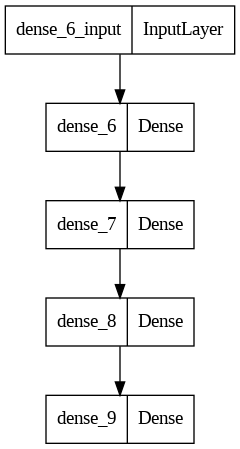

In [ ]:
plot_model(classifier)

# Learning process

In [ ]:
#specify adam optimizer, binary cross-entropy loss and accuracy as additional metric
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = classifier.fit(X, Y, epochs=250, batch_size=16, validation_split=0.2)

Epoch 1/250
27/27 [==============================] - 2s 16ms/step - loss: 1.5324 - accuracy: 0.5647 - val_loss: 1.1926 - val_accuracy: 0.4766
Epoch 2/250
27/27 [==============================] - 0s 9ms/step - loss: 1.1020 - accuracy: 0.5953 - val_loss: 1.0394 - val_accuracy: 0.6075
Epoch 3/250
27/27 [==============================] - 0s 7ms/step - loss: 0.9837 - accuracy: 0.6306 - val_loss: 0.9709 - val_accuracy: 0.5981
Epoch 4/250
27/27 [==============================] - 0s 6ms/step - loss: 0.8816 - accuracy: 0.6541 - val_loss: 0.8809 - val_accuracy: 0.6262
Epoch 5/250
27/27 [==============================] - 0s 5ms/step - loss: 0.8098 - accuracy: 0.6494 - val_loss: 0.8054 - val_accuracy: 0.5981
Epoch 6/250
27/27 [==============================] - 0s 5ms/step - loss: 0.7651 - accuracy: 0.6565 - val_loss: 0.7619 - val_accuracy: 0.6262
Epoch 7/250
27/27 [==============================] - 0s 6ms/step - loss: 0.7192 - accuracy: 0.6471 - val_loss: 0.7469 - val_accuracy: 0.6168
Epoch 8/250


# Visualize training results

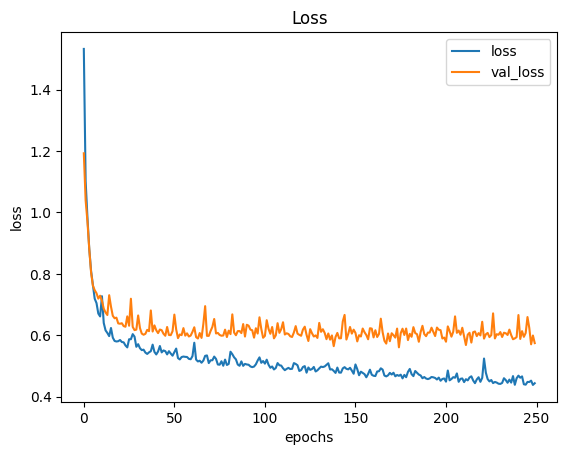

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])

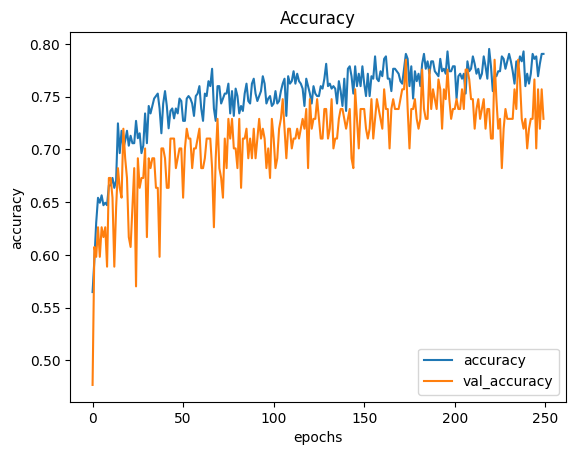

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])